Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data set

In [2]:
df=pd.read_csv("/content/diabetes_data (1).csv")

Display the following:

First 5 rows (head())

Dataset shape

Data types of each column

Summary statistics (describe())

Count of missing values per column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    float64
 1   Glucose                   722 non-null    float64
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             726 non-null    float64
 4   Insulin                   735 non-null    float64
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  734 non-null    float64
 7   Age                       735 non-null    float64
 8   Outcome                   739 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0

In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   728.000000  722.000000     735.000000     726.000000  735.000000   
mean      3.912088  120.671745      68.927891      20.632231   80.268027   
std       3.382204   31.982858      19.590744      16.012616  116.198612   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   29.000000   
75%       6.000000  140.750000      80.000000      32.000000  130.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  729.000000                734.000000  735.000000  739.000000  
mean    32.028807                  0.467578   33.308844    0.341001  
std      7.904681                  0.325979   11.727195    0.474367  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.238250   24.000000    0.000000  
50%     32.000000                  0.368000   29.000000    0.000000  
75%     36.600000                  0.622750   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
df.isna().sum() # count of missing values for each column

Pregnancies                 40
Glucose                     46
BloodPressure               33
SkinThickness               42
Insulin                     33
BMI                         39
DiabetesPedigreeFunction    34
Age                         33
Outcome                     29
dtype: int64

In [9]:
df.isna().sum()/len(df)*100

Pregnancies                 5.208333
Glucose                     5.989583
BloodPressure               4.296875
SkinThickness               5.468750
Insulin                     4.296875
BMI                         5.078125
DiabetesPedigreeFunction    4.427083
Age                         4.296875
Outcome                     3.776042
dtype: float64

In [12]:
for  i in df.columns:
  print(df.value_counts(df[i]))

Pregnancies
1.0     124
0.0     101
2.0     100
3.0      71
4.0      66
5.0      54
6.0      47
7.0      43
8.0      37
9.0      28
10.0     24
11.0     11
12.0      9
13.0      9
14.0      2
15.0      1
17.0      1
Name: count, dtype: int64
Glucose
99.0     16
100.0    16
125.0    14
102.0    13
112.0    13
         ..
186.0     1
190.0     1
191.0     1
198.0     1
199.0     1
Name: count, Length: 135, dtype: int64
BloodPressure
70.0     56
74.0     48
78.0     44
68.0     44
72.0     43
64.0     39
76.0     37
80.0     36
60.0     36
0.0      35
62.0     33
66.0     30
82.0     29
88.0     24
84.0     23
58.0     20
86.0     20
90.0     20
56.0     12
50.0     12
52.0     11
54.0      8
75.0      7
65.0      7
92.0      7
94.0      6
85.0      6
48.0      5
96.0      4
44.0      4
110.0     3
106.0     3
100.0     3
98.0      3
108.0     2
46.0      2
30.0      2
55.0      2
38.0      1
40.0      1
24.0      1
61.0      1
95.0      1
104.0     1
102.0     1
114.0     1
122.0     1
N

In [18]:
def Imputation_plots(df):
  for i in df.columns:
    if df[i].dtypes!="O":
      sns.boxplot(df[i])
      plt.title(i)
      plt.show()

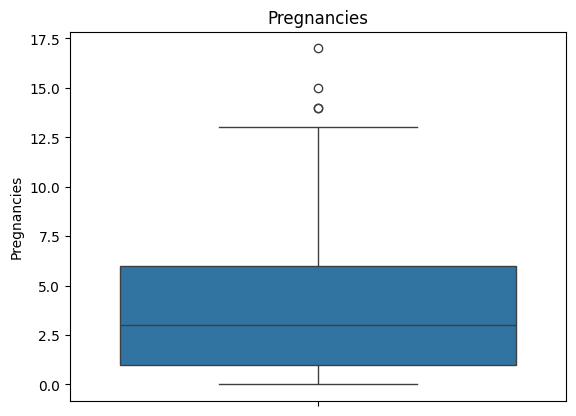

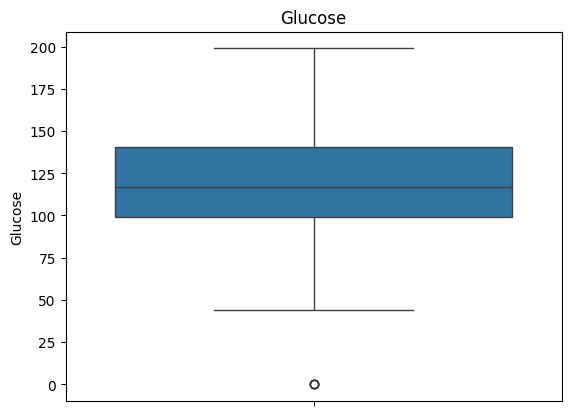

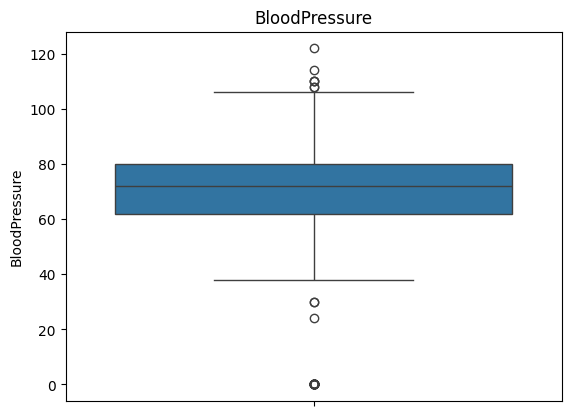

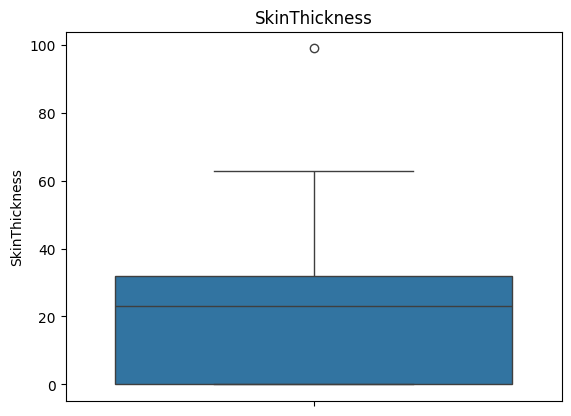

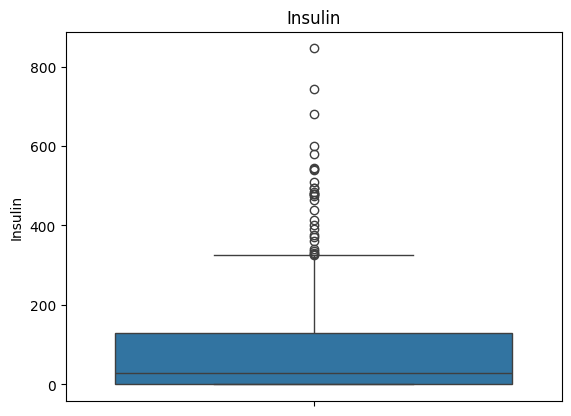

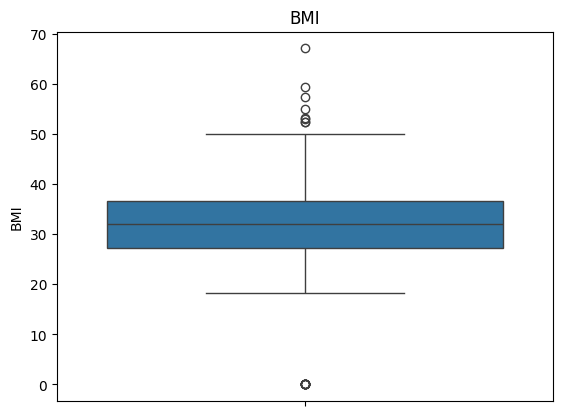

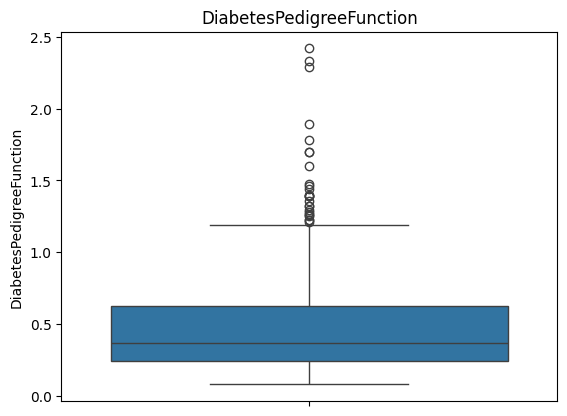

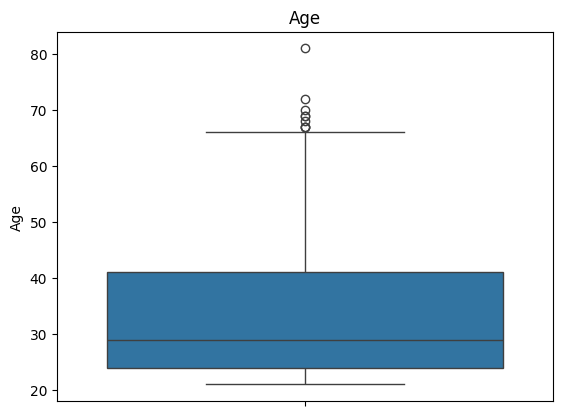

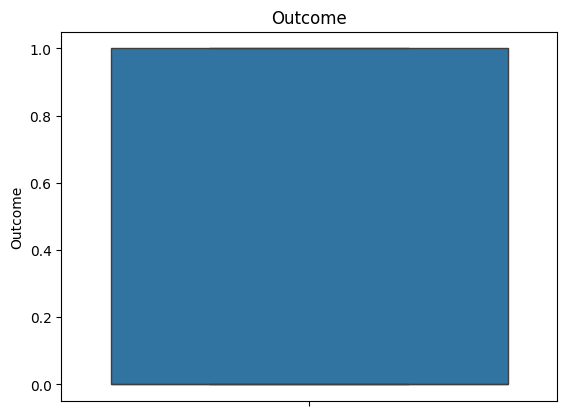

In [19]:
Imputation_plots(df)

Observations:
By Observing above boxplots we can say which column have outliers.


Pregnancies: It have outliers and containing less outliers.
Glucose:     It have outliers and containing one outlier.
BloodPressure:It have outliers and containing both side outliers.
SkinThickness:It have outliers and containing one outlier.
Insulin: It have extreme outliers
BMI:It have outliers on both side
DiabetesPedigreeFunction:It have extreme outliers
Age:It have extreme outliers

-->Missing Value Imputation (Mean, Median, Mode)
mode for discrete data and text data
mean we can go with mean when data does not containing outliers
median we can go with median when data containing outliers

PART 2: Missing Value Imputation (Mean, Median, Mode)
Tasks:
Identify numerical columns containing missing values.

For each such column:

Decide whether to use Mean, Median, or Mode imputation.

Provide a 2–3 line justification for your choice.

In [27]:
#pregnancies is descrete numerical so we go with mode

df["Pregnancies"]=df["Pregnancies"].fillna(df["Pregnancies"].mode()[0])
print(df["Pregnancies"].isna().sum())

0


In [28]:
#Glucose is real Numeric
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].median())
print(df["Glucose"].isna().sum())

0


In [29]:
#Blood Pressure is continuous numerical
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].median())
print(df["BloodPressure"].isna().sum())

0


In [30]:
#SkinThickness is continuous numeric
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].median())
print(df["SkinThickness"].isna().sum())

0


In [31]:
#Insulin is real numerical
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].median())
print(df["Insulin"].isna().sum())

0


In [33]:
# BMi is continuous numerical
df["BMI"] = df["BMI"].fillna(df["BMI"].median())
print(df["BMI"].isna().sum())

0


In [34]:
#DiabetesPedigreeFunction is real  numerical
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"].fillna(df["DiabetesPedigreeFunction"].median())
print(df["DiabetesPedigreeFunction"].isna().sum())

0


In [35]:
# Age is discrete but in ml we can treated as real numeric but here we can go discrete
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])
print(df["Age"].isna().sum())


0


In [36]:
# outcome is discrete numeric
df["Outcome"] = df["Outcome"].fillna(df["Outcome"].mode()[0])
print(df["Outcome"].isna().sum())

0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [42]:
def distribution_plots(df):
  for i in df.columns:
    if df[i].dtypes!="O":
      sns.kdeplot(df[i])
      plt.title(i)
      plt.show()

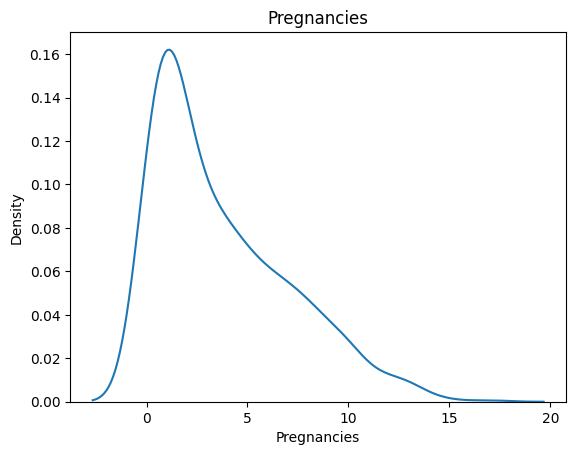

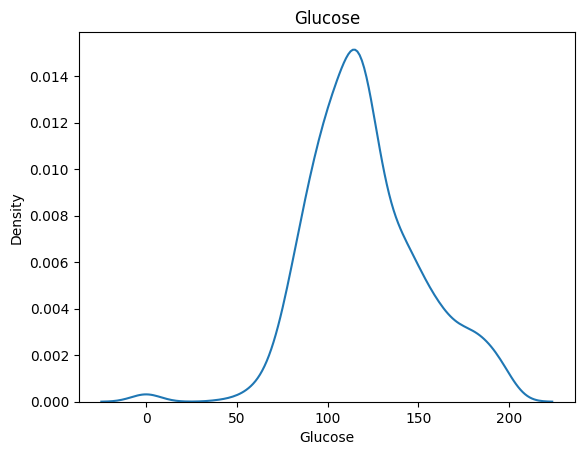

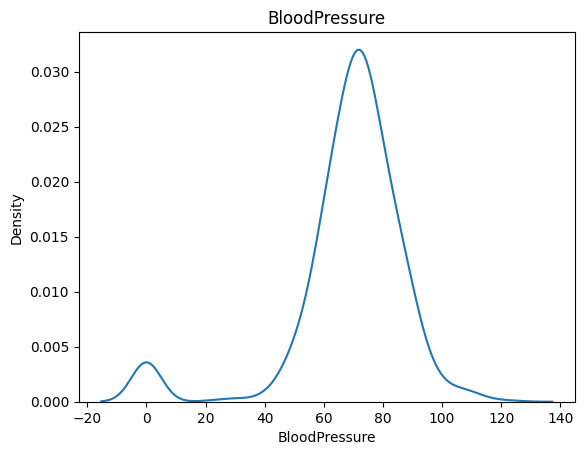

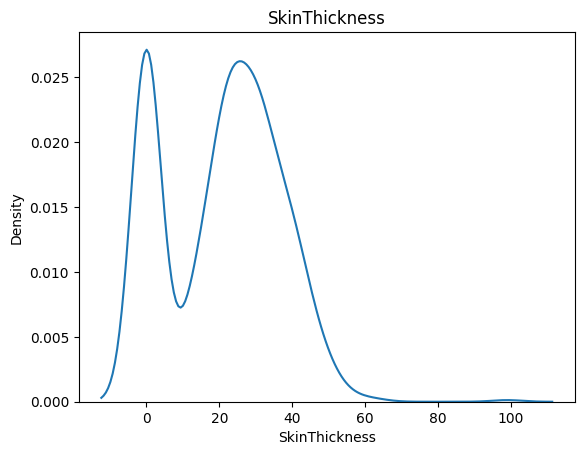

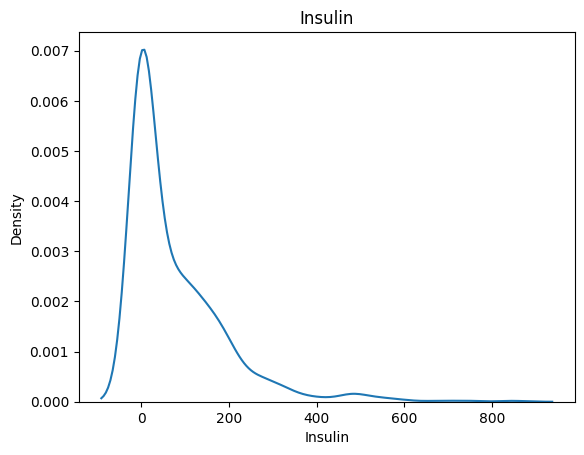

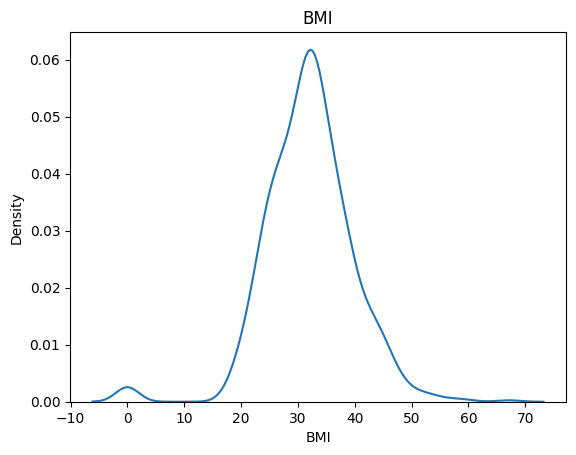

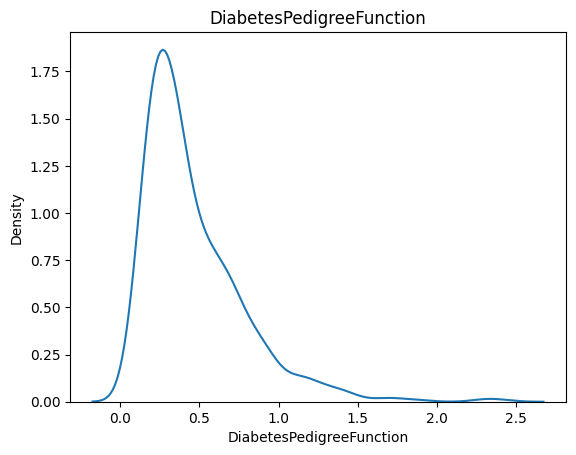

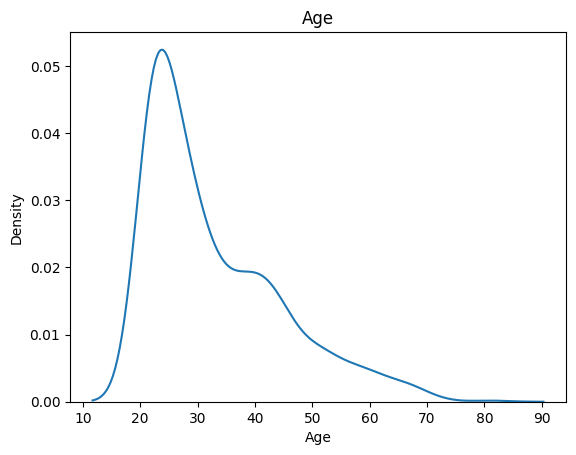

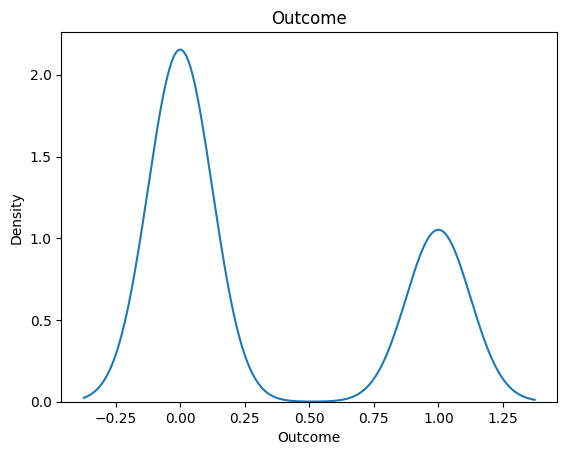

In [43]:
distribution_plots(df)

These are before kde plots.

In [44]:
# Chossing target and predictors
x=df.drop(columns="Outcome")
y=df["Outcome"]

In [46]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


Splitting the data into train and test data

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [49]:
x_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603          7.0    150.0           78.0           29.0    126.0  35.2   
118          4.0     97.0           60.0           23.0      0.0  28.2   
247          0.0    165.0           90.0           33.0    680.0  52.3   
157          1.0    117.0           56.0           21.0    135.0  25.2   
468          8.0    120.0            0.0            0.0      0.0  30.0   

     DiabetesPedigreeFunction   Age  
603                     0.692  54.0  
118                     0.443  22.0  
247                     0.427  23.0  
157                     0.833  23.0  
468                     0.183  38.0

 PART 4: Data Scaling
Apply the following scaling techniques:
StandardScaler
MinMaxScaler
RobustScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train_trans=mm.fit_transform(x_train)
x_test_trans=mm.transform(x_test)

In [51]:
print(x_train_trans.shape)
print(x_test_trans.shape)

(614, 8)
(154, 8)


In [52]:
x_train_trans=pd.DataFrame(x_train_trans,columns=x_train.columns)
x_test_trans=pd.DataFrame(x_test_trans,columns=x_test.columns)

In [53]:
x_train_trans.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.411765  0.757576       0.639344       0.292929  0.148936  0.524590   
1     0.235294  0.489899       0.491803       0.232323  0.000000  0.420268   
2     0.000000  0.833333       0.737705       0.333333  0.803783  0.779434   
3     0.058824  0.590909       0.459016       0.212121  0.159574  0.375559   
4     0.470588  0.606061       0.000000       0.000000  0.000000  0.447094   

   DiabetesPedigreeFunction       Age  
0                  0.262169  0.550000  
1                  0.155850  0.016667  
2                  0.149018  0.033333  
3                  0.322374  0.033333  
4                  0.044833  0.283333

In [55]:
Diabetes_minmax_scaled_X = pd.concat([x_train_trans,x_test_trans],ignore_index = True)

In [56]:
Diabetes_minmax_scaled_y = pd.concat([y_train,y_test],ignore_index = True)

In [57]:
Diabetes_minmax_scaled = pd.concat([Diabetes_minmax_scaled_X,Diabetes_minmax_scaled_y],axis = 1)

In [58]:
Diabetes_minmax_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.411765  0.757576       0.639344       0.292929  0.148936  0.524590   
1     0.235294  0.489899       0.491803       0.232323  0.000000  0.420268   
2     0.000000  0.833333       0.737705       0.333333  0.803783  0.779434   
3     0.058824  0.590909       0.459016       0.212121  0.159574  0.375559   
4     0.470588  0.606061       0.000000       0.000000  0.000000  0.447094   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.262169  0.550000      1.0  
1                  0.155850  0.016667      0.0  
2                  0.149018  0.033333      0.0  
3                  0.322374  0.033333      0.0  
4                  0.044833  0.283333      1.0

In [59]:
Diabetes_minmax_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [61]:
Diabetes_minmax_scaled.shape

(768, 9)

In [62]:
def distribution_plots(df):
  for i in df.columns:
    if df[i].dtypes!="O":
      sns.kdeplot(df[i])
      plt.title(i)
      plt.show()

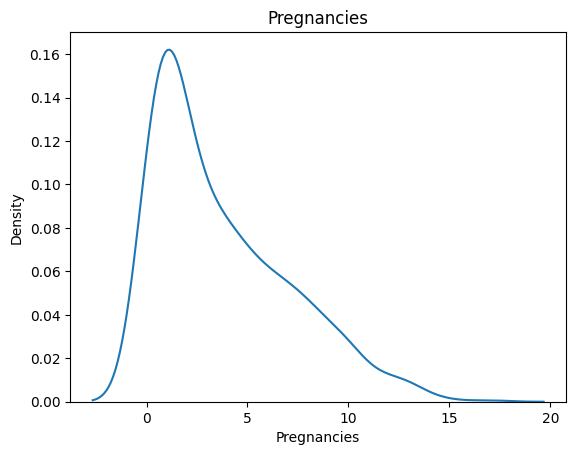

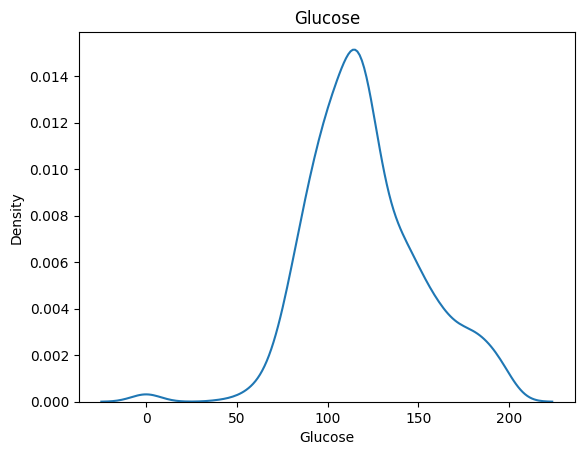

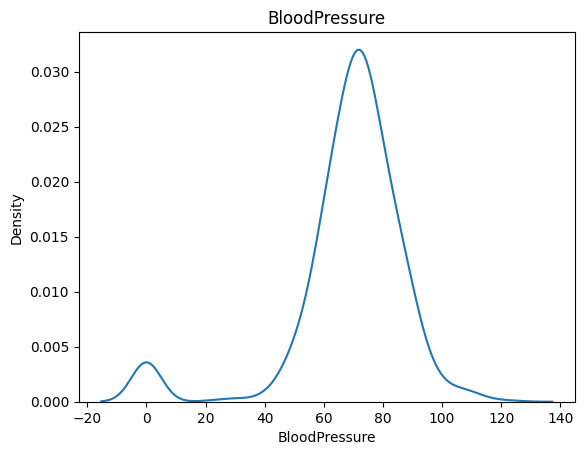

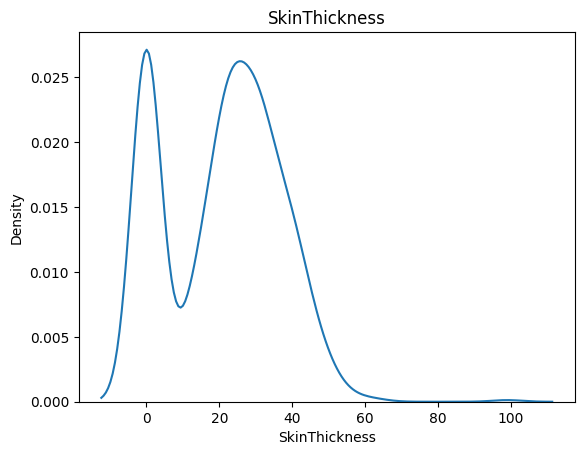

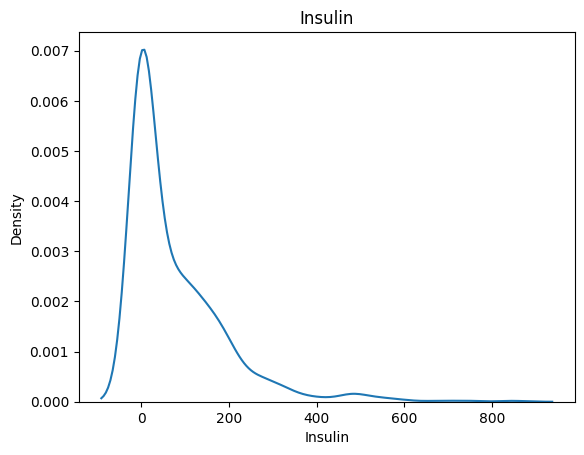

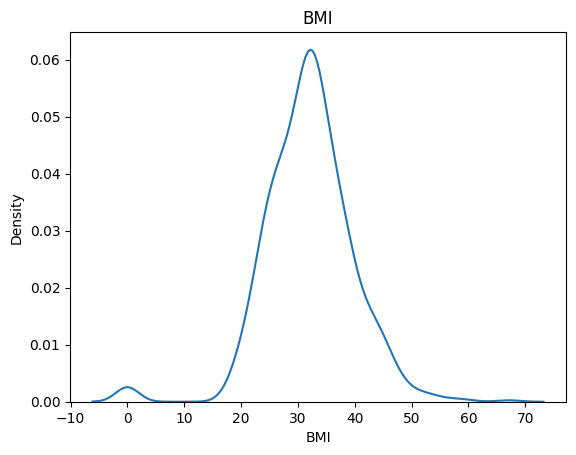

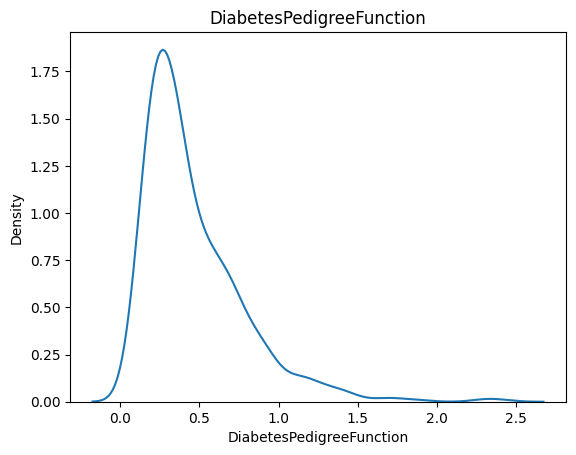

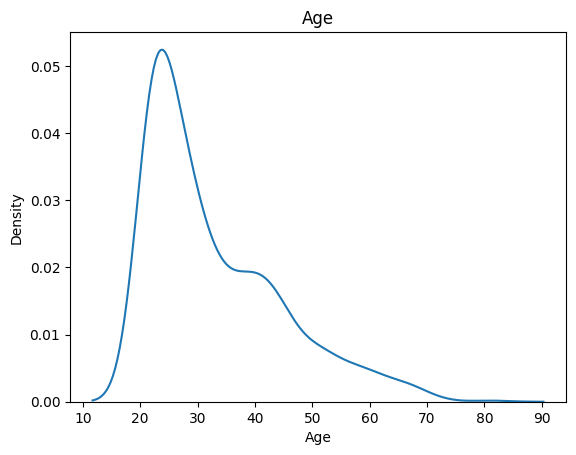

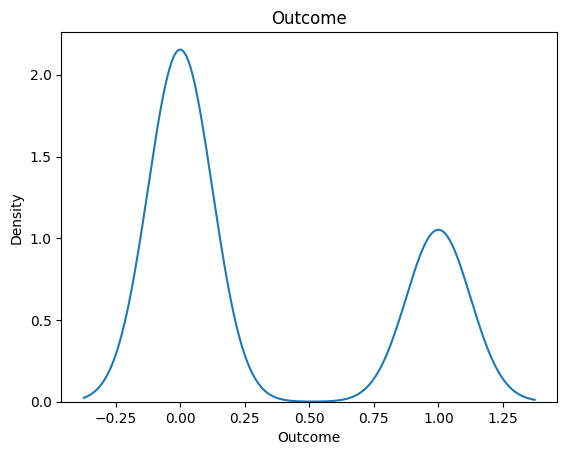

In [63]:
distribution_plots(df)

There is no change in the data distribution

In [64]:
Diabetes_minmax_scaled.to_csv("Diabetes_minmax_scaled.csv")

Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_stand = scaler.fit_transform(x_train)
x_test_stand = scaler.transform(x_test)

In [67]:
x_train_stand.shape

(614, 8)

In [69]:
x_train_stand=pd.DataFrame(x_train_stand,columns=x_train.columns)
x_test_stand=pd.DataFrame(x_test_stand,columns=x_test.columns)

In [70]:
x_train_stand.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.937478  0.967621       0.463244       0.518735  0.395451  0.381028   
1     0.061801 -0.764410      -0.466609       0.135688 -0.689200 -0.514944   
2    -1.105768  1.457818       1.083145       0.774100  5.164468  2.569760   
3    -0.813876 -0.110813      -0.673243       0.008006  0.472926 -0.898932   
4     1.229371 -0.012774      -3.566118      -1.332658 -0.689200 -0.284551   

   DiabetesPedigreeFunction       Age  
0                  0.736259  1.727340  
1                 -0.043068 -0.937032  
2                 -0.093146 -0.853771  
3                  1.177565 -0.853771  
4                 -0.856824  0.395154

In [71]:
Diabetes_standard_scaled_X = pd.concat([x_train_stand,x_test_stand],ignore_index = True)

In [72]:
Diabetes_standard_scaled_y = pd.concat([y_train,y_test],ignore_index = True)

In [73]:
Diabetes_standard_scaled = pd.concat([Diabetes_standard_scaled_X,Diabetes_standard_scaled_y],axis = 1)


In [74]:
Diabetes_standard_scaled.to_csv("Diabetes_standard_scaled.csv")

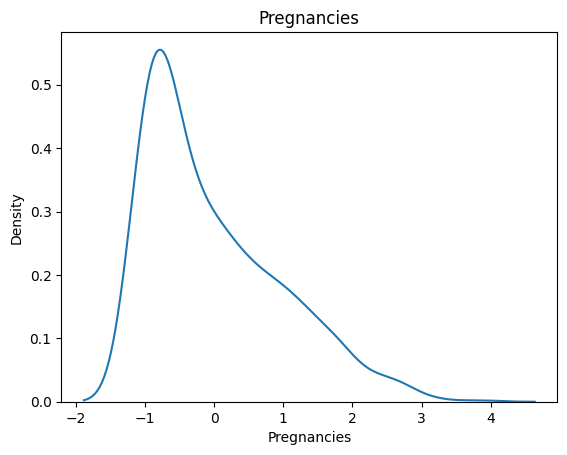

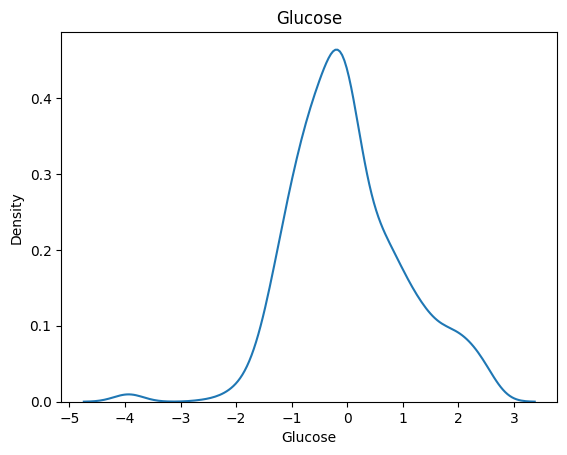

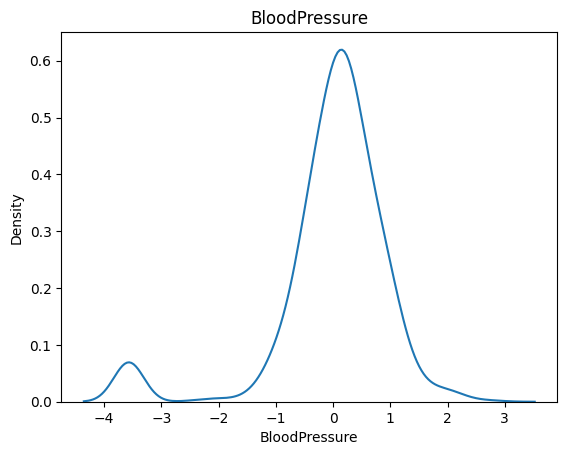

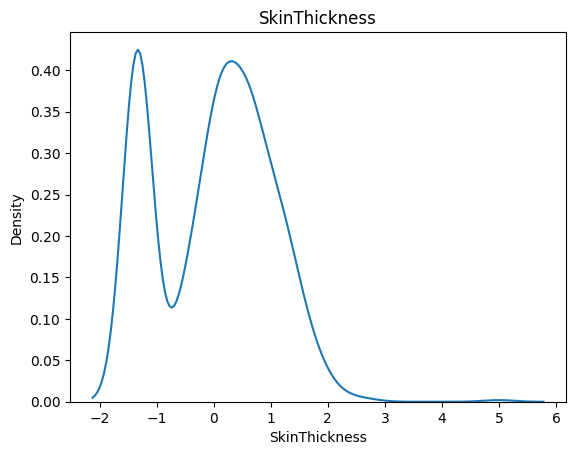

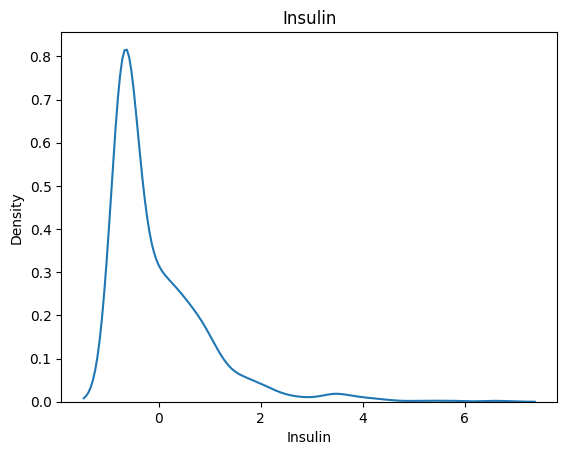

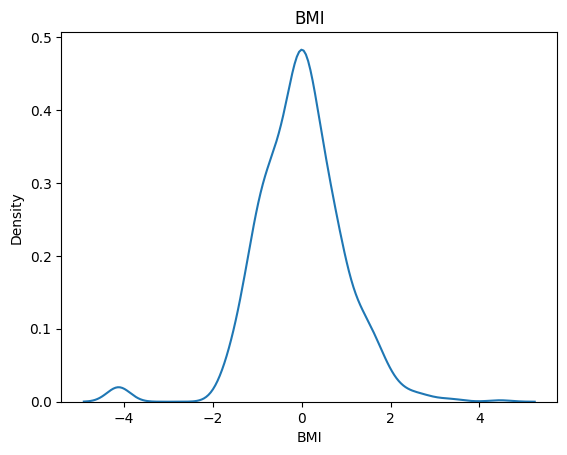

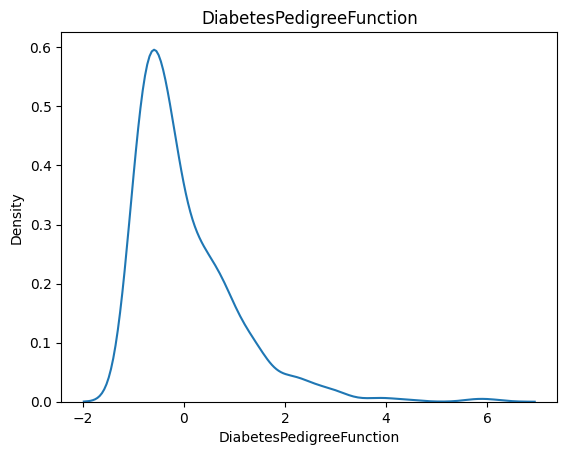

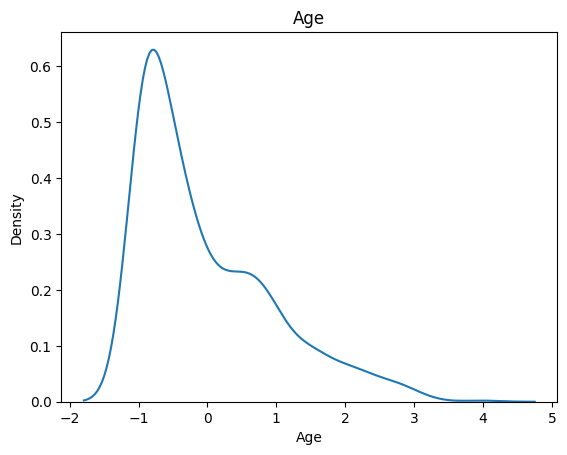

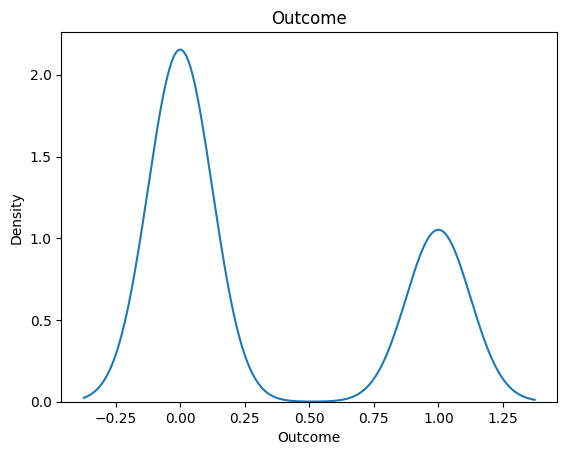

In [75]:
distribution_plots(Diabetes_standard_scaled)

There is no change in the distribution but here mean=0 and std=1

Applying Robust Scaler

In [76]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_robust = scaler.fit_transform(x_train)
x_test_robust = scaler.transform(x_test)

In [77]:
print(x_train_robust.shape)

(614, 8)


In [78]:
print(x_test_robust.shape)

(154, 8)


In [80]:
x_train_robust = pd.DataFrame(x_train_robust,columns = x_train.columns)
x_test_robust = pd.DataFrame(x_test_robust,columns = x_test.columns)

In [81]:
x_train_robust.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.8  0.851613          0.375        0.18750  0.760784  0.356546   
1          0.2 -0.516129         -0.750        0.00000 -0.227451 -0.423398   
2         -0.6  1.238710          1.125        0.31250  5.105882  2.261838   
3         -0.4  0.000000         -1.000       -0.06250  0.831373 -0.757660   
4          1.0  0.077419         -4.500       -0.71875 -0.227451 -0.222841   

   DiabetesPedigreeFunction       Age  
0                  0.926376  1.388889  
1                  0.214439 -0.388889  
2                  0.168692 -0.333333  
3                  1.329521 -0.333333  
4                 -0.528949  0.500000

In [82]:
diabetes_robust_scaled_X = pd.concat([x_train_robust,x_test_robust],ignore_index = True)

In [83]:
diabetes_robust_scaled_y = pd.concat([y_train,y_test],ignore_index = True)

In [84]:
diabetes_robust_scaled = pd.concat([diabetes_robust_scaled_X,diabetes_robust_scaled_y],axis = 1)

In [85]:
diabetes_robust_scaled.to_csv("Diabetes_robust_scaled.csv")

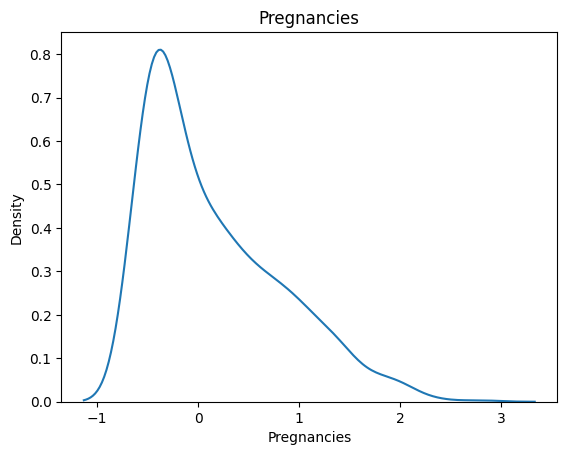

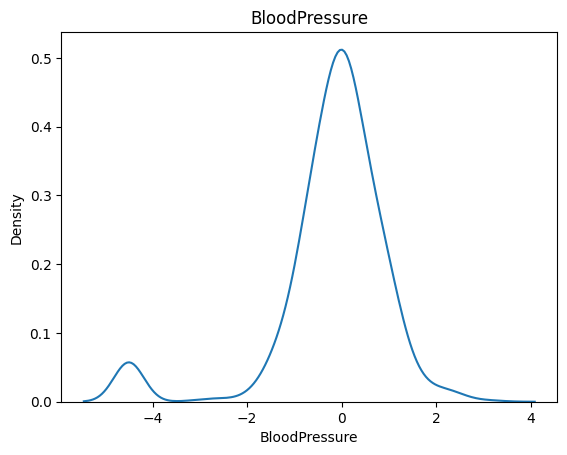

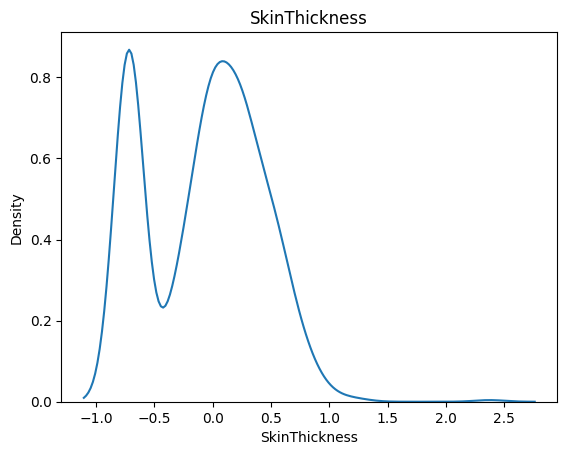

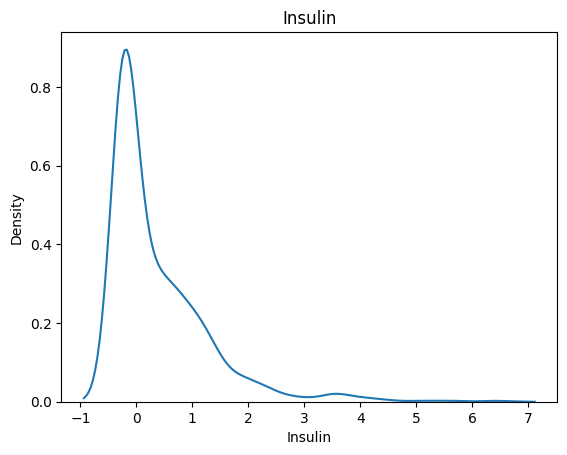

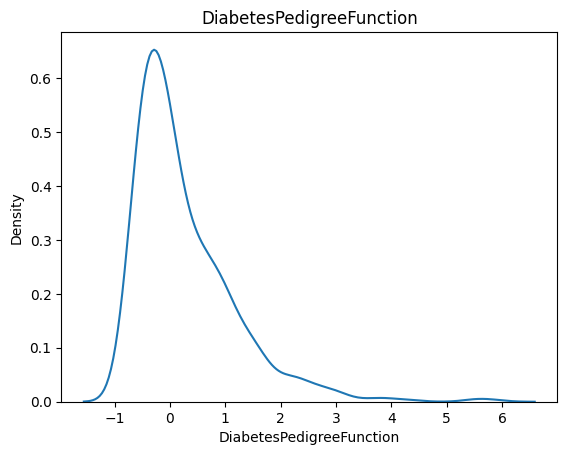

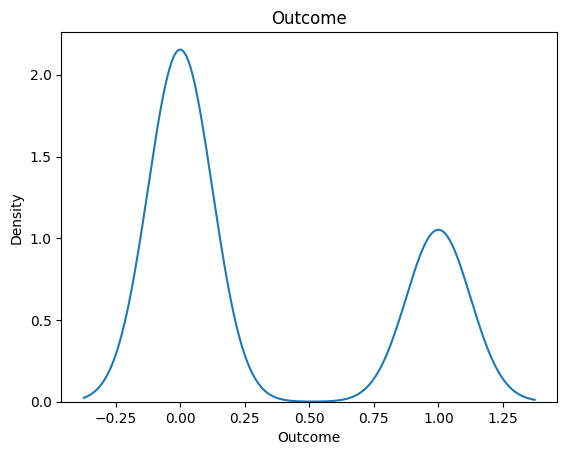

In [86]:
distribution_plots(diabetes_robust_scaled)

There is no change in the data distribution and there is no fixed minimum and maximum value